# Ablation Studies on the Hypersphere Radius

For the rebuttal.

In [34]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from os.path import join
from omegaconf import OmegaConf

sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")
xticks = list(range(1, 101, 10))

In [35]:


root = "/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad/"
# root = "/home/ki/projects/work/mchad/logs/multiruns/ablation/12/04/21-14:49:51/"

from matplotlib.ticker import FuncFormatter

dfs = []

for i in range(0, 20):
    # /home/ki/projects/work/mchad/logs/multiruns/ablation/01/20/22-09:18:24
    path = f"{root}/{i}/"
    print(join(path, "config.yaml"))
    cfg = OmegaConf.load(join(path, "config.yaml"))
    radius = cfg["radius"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["epoch", "step", "Distance/OSR/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$r$"] = radius
    tmp["epoch"] += 1
    dfs.append(tmp)

/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//0/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//1/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//2/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//3/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//4/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//5/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//6/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//7/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//8/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//9/config.yaml
/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/gmchad//10/config.yam

In [36]:
df = pd.concat(dfs).reset_index()

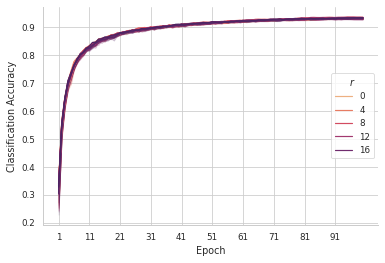

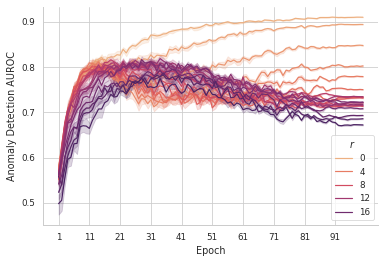

In [37]:
g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$r$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.legend(loc="center right", title="$r$")
plt.savefig("out/acc-radius.png", dpi=300)
plt.show()


g = sb.lineplot(
    data=df, x="epoch", y="Distance/OSR/AUROC/val", hue="$r$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/auroc-radius.png", dpi=300)
plt.show()